In [1]:
import sys
sys.path.append("..")
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2
from benchmarks.evaluator.oneshot import Evaluator
from benchmarks.evaluator.utils import plot_success_bars
from benchmarks.prompts.camb import get_prompts

In [3]:
df = get_prompts(reintial=False)

In [4]:
workdir = "../data/cmbagent_output/evals"

In [5]:
Ee4o = Evaluator(workdir,agent='engineer', model='gpt-4o', trials=10)
Ee41 = Evaluator(workdir,agent='engineer', model='gpt-4.1', trials=10)
Eeg = Evaluator(workdir,agent='engineer', model='gemini-2.5-pro-preview-03-25', trials=10)
Ecc = Evaluator(workdir,agent='camb_context', model='', trials=10)

In [6]:
Ee4o(df)
Ee41(df)
Eeg(df)
Ecc(df)

creating reference answers for prompts: 100%|█████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 17946.29it/s]


In [7]:
#Eeg.run_all()


In [8]:
#results = E.run_all()

In [55]:
scores = [Ee4o.success_all(), Ee41.success_all(), Eeg.success_all(), Ecc.success_all()]
# plot_success_bars(scores, ['GPT-4o', 'GPT-4.1', 'GEMINI-2.5 Pro', 'CAMB context'], ['lightgrey','silver','dimgrey','k'],width=0.2,figsize=(14,8),save='camb_success.pdf')

/Users/boris/CMBAgents/Benchmarks/examples/../benchmarks/evaluator/oneshot.py:232: FutureWarning: The 'special_case=True' option will be removed in a future version.
  result = self.success_prompt(idx, special_case=special_case)
/Users/boris/CMBAgents/Benchmarks/examples/../benchmarks/evaluator/oneshot.py:204: UserWarning: loadtxt: input contained no data: "../data/cmbagent_output/evals/prompt_engineergemini-2.5-pro-preview-03-25_2/trial_2/data/result.csv"
  x_llm, y_llm = np.loadtxt(resultfile, delimiter=',', skiprows=1).T
/Users/boris/CMBAgents/Benchmarks/examples/../benchmarks/evaluator/oneshot.py:204: UserWarning: loadtxt: input contained no data: "../data/cmbagent_output/evals/prompt_engineergemini-2.5-pro-preview-03-25_2/trial_3/data/result.csv"
  x_llm, y_llm = np.loadtxt(resultfile, delimiter=',', skiprows=1).T
/Users/boris/CMBAgents/Benchmarks/examples/../benchmarks/evaluator/oneshot.py:204: UserWarning: loadtxt: input contained no data: "../data/cmbagent_output/evals/prompt_e

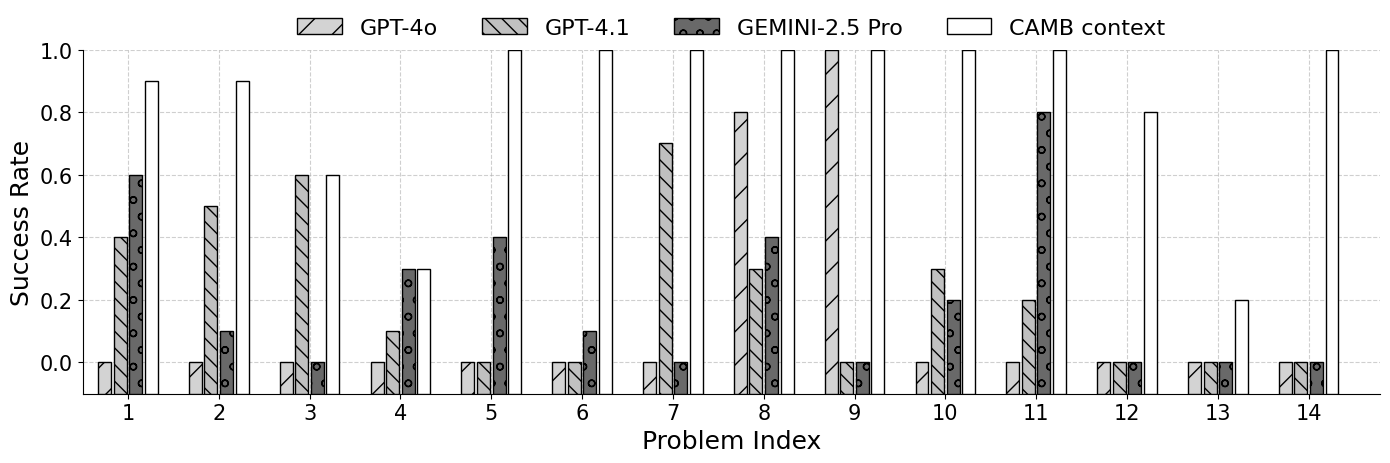

In [60]:
def plot_success_bars(
    data_arrays, labels, colors, width=0.2, gap=0.05, figsize=(12, 5), save=None, group_gap=1.4
):
    n_groups = len(data_arrays[0])
    x = np.arange(n_groups) * group_gap  # <-- space out group centers!
    n_bars = len(data_arrays)
    hatches = ['/', '\\\\', 'o', None]

    group_width = n_bars * width + (n_bars - 1) * gap * width

    fig, ax = plt.subplots(figsize=figsize)

    for i, (data, label) in enumerate(zip(data_arrays, labels)):
        offset = -group_width / 2 + i * (width + gap * width) + width / 2
        bars = ax.bar(
            x + offset,
            np.array(data) + 0.1,
            width,
            bottom=-0.1,
            label=label,
            color=colors[i],
            hatch=hatches[i % len(hatches)],
            zorder=3,
            edgecolor='k',
        )

    ax.set_ylabel('Success Rate', fontsize=18)
    ax.set_xlabel('Problem Index', fontsize=18)
    ax.set_xticks(x, labels=np.arange(1, n_groups + 1))
    ax.set_ylim(-0.1, 1)
    ax.set_xlim(x[0] - 0.7, x[-1] + 1.1)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.grid(True, linestyle='--', alpha=0.6, zorder=1)
    ax.legend(
        loc='upper center',
        bbox_to_anchor=(0.5, 1.15),
        ncol=4,
        framealpha=1,
        fontsize=16,
        frameon=False
    )
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    if save:
        plt.savefig(save, bbox_inches='tight', dpi=300)
    plt.show()



plot_success_bars(
    scores,
    ['GPT-4o', 'GPT-4.1', 'GEMINI-2.5 Pro', 'CAMB context'],
    ['lightgrey', 'silver', 'dimgrey', 'white'],
    width=0.2,
    gap=0.2,  # Increase for more space, try 0.05–0.3
    figsize=(14, 5),
    save='camb_success.pdf'
)

